In [16]:
import pandas as pd

columns = ["ts", "IDC", "IAC"]
file_path = r'..\0_raw\dmm_data6894024_2022_05_27_212453_all.dat'

#Abro el fichero, reemplazo los '\x00' y guardo en memoria
with open(file_path, 'r', encoding='latin-1', errors='ignore') as f:
    text = f.read().replace('\x00', '')

from io import StringIO
df = pd.read_csv(
    StringIO(text),
    delim_whitespace=True,
    names=columns,
    comment="#",
    engine="python"
)



In [11]:
df.head()

,ts,IDC_str,IAC_str
0,1.653680e+09,1.2158,0.000013
1,1.653680e+09,1.2158,0.000013
2,1.653680e+09,1.2159,0.000014
3,1.653680e+09,1.2159,0.000013
4,1.653680e+09,1.2159,0.000013


In [17]:
# time stamps
df["time"] = pd.to_datetime(df["ts"], unit="s") + pd.Timedelta(hours=2)
df = df.set_index("time")

# Integridad
print(df.isna().sum())                     # Buscar NaN
print(df.index.to_series().diff().describe())  # Revisar intervalos de ~4 s


ts     0
IDC    0
IAC    0
dtype: int64
count                        40438
mean     0 days 00:00:04.129773251
std      0 days 00:00:00.104520457
min      0 days 00:00:04.085529600
25%      0 days 00:00:04.100815424
50%      0 days 00:00:04.108120832
75%      0 days 00:00:04.165609600
max      0 days 00:00:23.586147584
Name: time, dtype: object


## Graph Analysis

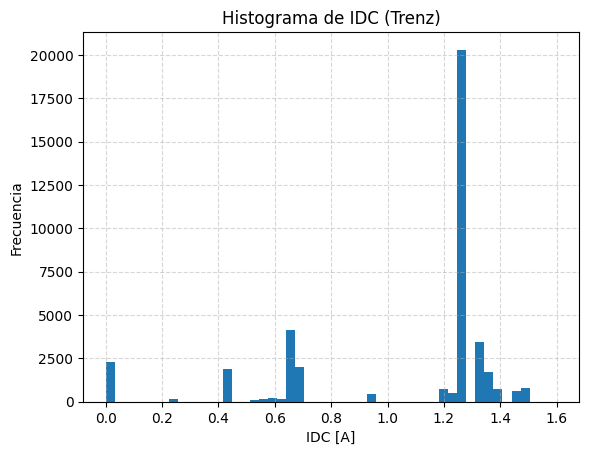

In [18]:
import matplotlib.pyplot as plt

xmin, xmax, nbins = 0.0, 1.6, 50
dt = (xmax - xmin) / nbins
bins = [xmin + dt * k for k in range(nbins + 1)]
df["IDC"].hist(bins=bins)
plt.xlabel("IDC [A]")
plt.ylabel("Frecuencia")
plt.title("Histograma de IDC (Trenz)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


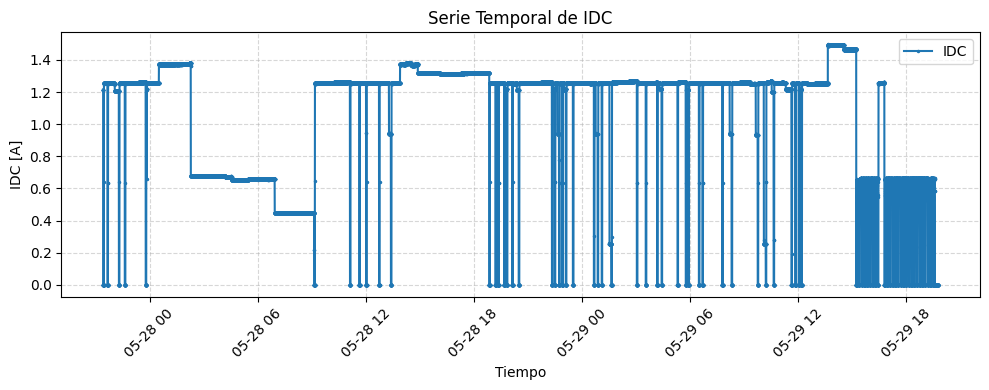

In [20]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["IDC"], linestyle="-", marker=".", markersize=3, label="IDC")
plt.xlabel("Tiempo")
plt.ylabel("IDC [A]")
plt.title("Serie Temporal de IDC")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


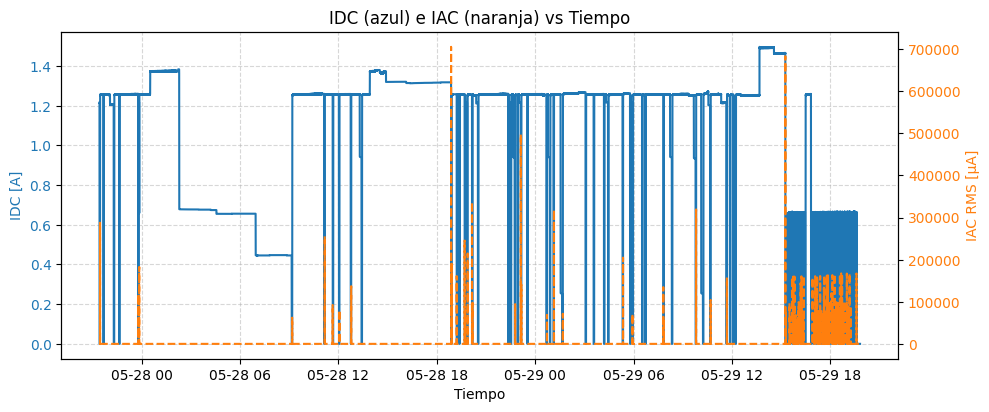

In [21]:
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.plot(df.index, df["IDC"], color="tab:blue", label="IDC [A]")
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("IDC [A]", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, which="both", linestyle="--", alpha=0.5)

ax2 = ax1.twinx()
ax2.plot(df.index, df["IAC"] * 1e6, color="tab:orange", linestyle="--", label="IAC [µA]")
ax2.set_ylabel("IAC RMS [µA]", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

fig.tight_layout()
plt.title("IDC (azul) e IAC (naranja) vs Tiempo")
plt.show()
